# Timber Section Capacity Calculations

## Ultimate Limit State

### Bending

The design strength of a timber beam is given by:

\begin{align}
f_{m,d} = \frac{k_{mod} k_h k_{sys} k_{crit} f_{mk}}{\gamma_M}\\
h \leq 150 \implies  k_h = \left(\frac{150}{h}\right)^{0.20}
\end{align}

It is assumed that the beams have adequate restraint such that $k_{crit} = 1$. For load sharing systems $k_{sys} = 1.1$ and for other systems $k_{sys} = 1.0$. $k_{mod}$ is taken from table 3.1 of BS EN 1995-1-1.The partial factor for the timber is taken to be $\gamma_m=1.3$.

The actual design stress within the beam is calculated by:

\begin{align}
\sigma_{m,d} = \frac{M_d}{Z}
\end{align}

Uniaxial bending strength is satisfied if:

$$ \sigma_{m,d} \leq f_{m,d} $$

### Shear

The design shear strength of a timber section is given by:

$$ f_{v,d} = \frac{k_{mod} k_{sys} f_{vk}}{\gamma_m} $$

The ULS stress within the section is calculated from:

$$ \tau_d = \frac{3}{2} \frac{V}{k_{cr}bh}$$

Sheat strength is satisfied if:

$$ \tau_d \leq f_{v,d} $$

The value of $k_{cr}$ allows for the effect of longitudinal cracks in the timber and is taken to be 0.67 as recommended in Cl 6.1.7 (2) of BS EN 1995-1-1.

### Axial compression parallel to the grain

The design strength parallel to the grain is given by:

\begin{align}
f_{c,0,d} = \frac{k_{sys} k_{mod} f_{c,0,k}}{\gamma_M}
\end{align}

The following equations from BS EN 1995-1-1 Cl 6.3.2 are used in assessing the reduction in design strength due to the effects of slenderness. 

\begin{align}
\lambda_{rel,y} = \frac{\lambda_y}{\pi} \sqrt{\frac{f_{c,0,k}}{E_{0.005}}} \text{ Where } \lambda_y = \frac{le_y}{r_y}\\
\lambda_{rel,z} = \frac{\lambda_z}{\pi} \sqrt{\frac{f_{c,0,k}}{E_{0.005}}} \text{ Where } \lambda_z = \frac{le_z}{r_z}\\
k_y = 0.50(1+\beta_c(\lambda_{rel,y} - 0.30)+\lambda_{rel,y}^2)\\
k_z = 0.50(1+\beta_c(\lambda_{rel,z} - 0.30)+\lambda_{rel,z}^2)\\
k_{c,y} = \frac{1}{k_y + \sqrt(k_y^2 - \lambda_{rel,y}^2)}\\
k_{c,z} = \frac{1}{k_z + \sqrt(k_z^2 - \lambda_{rel,z}^2)}
\end{align}

A compliant design for axial compression demonstrates the following for buckling about the $y$ and $z$ axis:

\begin{align}
\sigma_{c,0,d} \leq k_{c,y} f_{c,0,d}\\
\sigma_{c,0,d} \leq k_{c,z} f_{c,0,d}
\end{align}

The plot below gives the the design moment and shear capacity of the timber section.

In [1]:
from timber import *

This is k_cy 0.7248061757170874
This is k_cz 1.0638297872340425


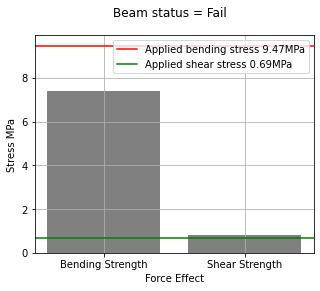

In [14]:
# For a timber section and print the capacities
b1 = TimberBeam(b=50, h=195, grade='C16', ksys=1, service_class=2, 
                ley=3000, lez=0)
b1.capacity_check(M=3, V=3, F=2)

# Racking Shear Calculations

The design racking strength of a wall diaphragm $F_{i,v,Rd} = K_{opening} K_{i,w} f_{p,d,t} L$

Where: $f_{p,d,t} = f_{p,d,1} + K_{comb} f_{p,d,2}$

The design shear capacity per unit length of the perimeter fasteners to the sheathing ($f_{p,d}$) is given by:

$$f_{p,d} = \frac{1.2 F_{t,Rd} (1+2.5s)}{s}$$

Where $F_{f,Rd}$ is the design capacity of a single fixing.

# Connections

## Withdrawal Capacities

In [3]:
withdrawalData = {'C16':[5.09,5.38,5.77,5.96,6.44,7.21,7.69],
                 'C24':[6.49,6.86,7.35,7.60,8.21,9.19,9.80]}
withdrawal = pd.DataFrame(withdrawalData)
nailDiameters = [2.65, 2.80, 3, 3.1, 3.35, 3.75, 4]
withdrawal.index = nailDiameters
print('Characteristic withdrawal resistance for smooth nails:')
display(withdrawal)

Characteristic withdrawal resistance for smooth nails:


,C16,C24
2.65,5.09,6.49
2.80,5.38,6.86
3.00,5.77,7.35
3.10,5.96,7.60
3.35,6.44,8.21
3.75,7.21,9.19
4.00,7.69,9.80


The withdrawl load of a screw is given by:

$$R_{d,withdrawal} = \frac{4t_{pen}nk_{mod}R_k}{\gamma_M}$$

In [4]:
# axial withdrawal load for a screw 
# tpen >= 8 x nominal diameter
grade = 'C24'
n = 1
d = 4
Rk = withdrawal.loc[d,grade]
kmod = 0.6
tpen = 120
gm = 1.3

Rdw = 4 * tpen * n * kmod * Rk / gm
print('Withdrawl capacity of a {:.2f}mm diameter nail with a pointside penetration of {:.2f}mm is {:.2f}N'.
      format(d, tpen, Rdw))


Withdrawl capacity of a 4.00mm diameter nail with a pointside penetration of 120.00mm is 2171.08N


# Force effects

## Deflection

Combined bending and shear deflection is a simply supported beam is given by:

$$\delta = \frac{5wl^4}{384EI} + \frac{V_{app}}{8 G_m bd}$$